# Limpeza e pré-processamento dos dados 

In [74]:
# Importando as bibliotecas para limpeza e pré processamento
import pandas as pd 
import numpy as np 

In [75]:
# Carregando o dataset e transformando em dataframe do pandas 
df = pd.read_csv("../Data/Autism_Data.arff", na_values="?") # Nos campos com valor "?" serão atribuídos valores NaN

In [76]:
# Imprimindo as 5 primeiras linhas do dataframe 
df.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO



### A1_Score → Pergunta se a pessoa costuma notar sons pequenos que os outros não percebem.
- Isso avalia uma sensibilidade sensorial maior, algo que pode aparecer em pessoas no espectro.

### A2_Score → Quer saber se a pessoa foca mais no "todo" do que nos detalhes.
- Quem está no espectro pode ter tendência a prestar mais atenção nos detalhes.

### A3_Score → Mede se a pessoa acha fácil fazer várias coisas ao mesmo tempo.
- Dificuldade com multitarefa pode ser um indício de traço autista.

### A4_Score → Pergunta se, após uma interrupção, a pessoa consegue voltar rápido ao que estava fazendo.
- Aqui se avalia flexibilidade cognitiva — que costuma ser mais desafiadora no espectro.

### A5_Score → Avalia se a pessoa consegue "ler nas entrelinhas" quando alguém fala.
- É uma forma de medir a compreensão de comunicação implícita, muitas vezes difícil para autistas.

### A6_Score → Pergunta se a pessoa percebe quando alguém está entediado numa conversa.
- Isso reflete a sensibilidade a sinais sociais sutis, como linguagem corporal e expressões.

### A7_Score → Quer saber se a pessoa entende bem as intenções dos personagens ao ler uma história.
- Isso está ligado à teoria da mente, que pode ser mais limitada em quem tem autismo.

### A8_Score → Pergunta se a pessoa gosta de colecionar informações sobre categorias específicas (como carros ou pássaros).
- É um jeito de avaliar interesses restritos ou muito focados.

### A9_Score → Mede se a pessoa consegue entender sentimentos só olhando para o rosto de alguém.
- Interpretação de expressões faciais pode ser uma dificuldade comum no espectro.

### A10_Score → Pergunta se a pessoa tem dificuldade em entender as intenções das outras pessoas.
- Novamente, está relacionado à teoria da mente e à percepção social.

In [77]:
# Exibindo o nomes das colunas 
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [78]:
# Exibindo as informações do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [79]:
# Verificando a quantidade de valores nulos para cada coluna 
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [80]:
# Renomeando colunas com erros de digitação 
df.rename(columns={
    "jundice": "jaundice",
    "contry_of_res": "country_of_res", 
    "Class/ASD": "class_asd"
}, inplace=True)

In [81]:
# Padronizando todas as colunas para letras minusculas 
df.columns = [col.lower() for col in df.columns]

# Nomes das colunas após as alterações 
df.columns

Index(['a1_score', 'a2_score', 'a3_score', 'a4_score', 'a5_score', 'a6_score',
       'a7_score', 'a8_score', 'a9_score', 'a10_score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'class_asd'],
      dtype='object')

In [82]:
# Colunas a serem removidas 
colunas_remocao = ["age_desc", "used_app_before", "country_of_res", "relation"]

df.drop(columns=colunas_remocao, inplace=True)

In [83]:
# Mapeamento para colunas binárias com Label Encoding
# Transforma os valores de sexo feminino para 0 e masculino para 1
df["gender"] = df["gender"].map({"f": 0, "m": 1})

# Transforam os valores dos campos "no" para 0 e "yes" para 1
df["jaundice"] = df["jaundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})
df["class_asd"] = df["class_asd"].map({"NO": 0, "YES": 1})

# Atribuindo a técnica One-Hot-Encoding para a coluna etnia 
df = pd.get_dummies(df, columns=["ethnicity"], prefix="ethnicity", drop_first=True)

# Exibindo as 5 primeiras linhas do dataframe após a técnica de Encoding
df.head()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,...,ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others
0,1,1,1,1,0,0,1,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1,1,1,0,1,0,0,0,1,0,1,...,False,False,False,False,True,False,False,False,False,False
2,1,1,0,1,1,0,1,1,1,1,...,False,False,False,False,True,False,False,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,True,False
4,1,0,0,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [84]:
# Verificando a quantidade de valores nulos 
df.isnull().sum()

a1_score                    0
a2_score                    0
a3_score                    0
a4_score                    0
a5_score                    0
a6_score                    0
a7_score                    0
a8_score                    0
a9_score                    0
a10_score                   0
age                         2
gender                      0
jaundice                    0
austim                      0
result                      0
class_asd                   0
ethnicity_'South Asian'     0
ethnicity_Asian             0
ethnicity_Black             0
ethnicity_Hispanic          0
ethnicity_Latino            0
ethnicity_Others            0
ethnicity_Pasifika          0
ethnicity_Turkish           0
ethnicity_White-European    0
ethnicity_others            0
dtype: int64

In [85]:
# Removendo colunas duplicadas 
df.drop(columns="ethnicity_Others", inplace=True)

# Tratando outliers e valores ausentes da coluna age
df.loc[df['age'] > 100, 'age'] = np.nan  # Valores extremos são substituídos por NaN
df["age"].fillna(df["age"].median(), inplace=True) # Os valores ausentes são substituídos pela mediana

C:\Users\Matheus\AppData\Local\Temp\ipykernel_17276\34651505.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True) # Os valores ausentes são substituídos pela mediana


In [86]:
# Exibindo as informações do dataframe, após as alterações e tratamento de outliers e valores nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   a1_score                  704 non-null    int64  
 1   a2_score                  704 non-null    int64  
 2   a3_score                  704 non-null    int64  
 3   a4_score                  704 non-null    int64  
 4   a5_score                  704 non-null    int64  
 5   a6_score                  704 non-null    int64  
 6   a7_score                  704 non-null    int64  
 7   a8_score                  704 non-null    int64  
 8   a9_score                  704 non-null    int64  
 9   a10_score                 704 non-null    int64  
 10  age                       704 non-null    float64
 11  gender                    704 non-null    int64  
 12  jaundice                  704 non-null    int64  
 13  austim                    704 non-null    int64  
 14  result    

# Análise Exploratória de Dados (EDA)

In [87]:
# Importando as bibliotecas de manipulação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns 

In [88]:
# Exibindo o dataframe
df

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,...,class_asd,ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others
0,1,1,1,1,0,0,1,1,0,0,...,0,False,False,False,False,False,False,False,True,False
1,1,1,0,1,0,0,0,1,0,1,...,0,False,False,False,False,True,False,False,False,False
2,1,1,0,1,1,0,1,1,1,1,...,1,False,False,False,False,True,False,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,0,False,False,False,False,False,False,False,True,False
4,1,0,0,0,0,0,0,1,0,0,...,0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,1,False,False,False,False,False,False,False,True,False
700,1,0,0,0,0,0,0,1,0,1,...,0,False,False,False,True,False,False,False,False,False
701,1,0,1,1,1,0,1,1,0,1,...,1,False,False,False,False,False,False,False,False,False
702,1,0,0,1,1,0,1,0,1,1,...,0,True,False,False,False,False,False,False,False,False


In [89]:
# Exibindo os dados estatísticos sobre o conjunto de dados 
df.describe()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,jaundice,austim,result,class_asd
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.184659,0.521307,0.098011,0.129261,4.875000,0.268466
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,9.691837,0.499901,0.297541,0.335728,2.501493,0.443476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,1.000000,0.000000,0.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,10.000000,1.000000


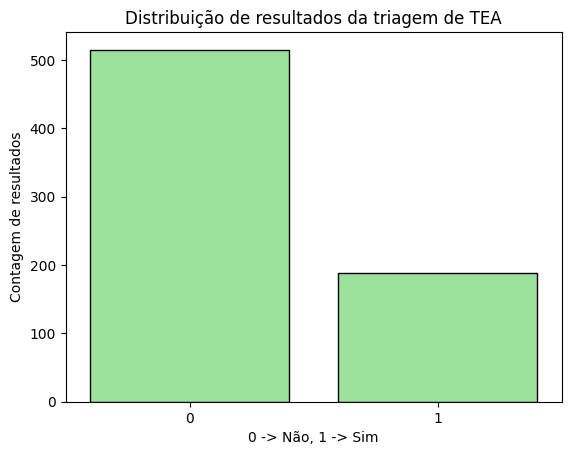

In [148]:
# Plotando gráfico de distribuição
# Countplot exibe a contagem das observações para cada classe, sendo 0 para não e 1 para sim, sendo o resultado final da triagem do TEA
sns.countplot(data=df, x='class_asd', color="lightgreen", edgecolor="black")
plt.title('Distribuição de resultados da triagem de TEA')
plt.xlabel("0 -> Não, 1 -> Sim")
plt.ylabel("Contagem de resultados")
plt.show()

In [91]:
# Contagem dos resultados 
contagem_resultados = df["class_asd"].value_counts()
contagem_resultados

class_asd
0    515
1    189
Name: count, dtype: int64

### Análise da Variável Alvo (`class_asd`)

O gráfico de contagem acima exibe a distribuição da nossa variável alvo. Fica evidente que o dataset é **desbalanceado**, com uma predominância de resultados negativos (classe 0) sobre os positivos (classe 1).

------------------------------------------------------------------------------------------------------------------------------------------------------

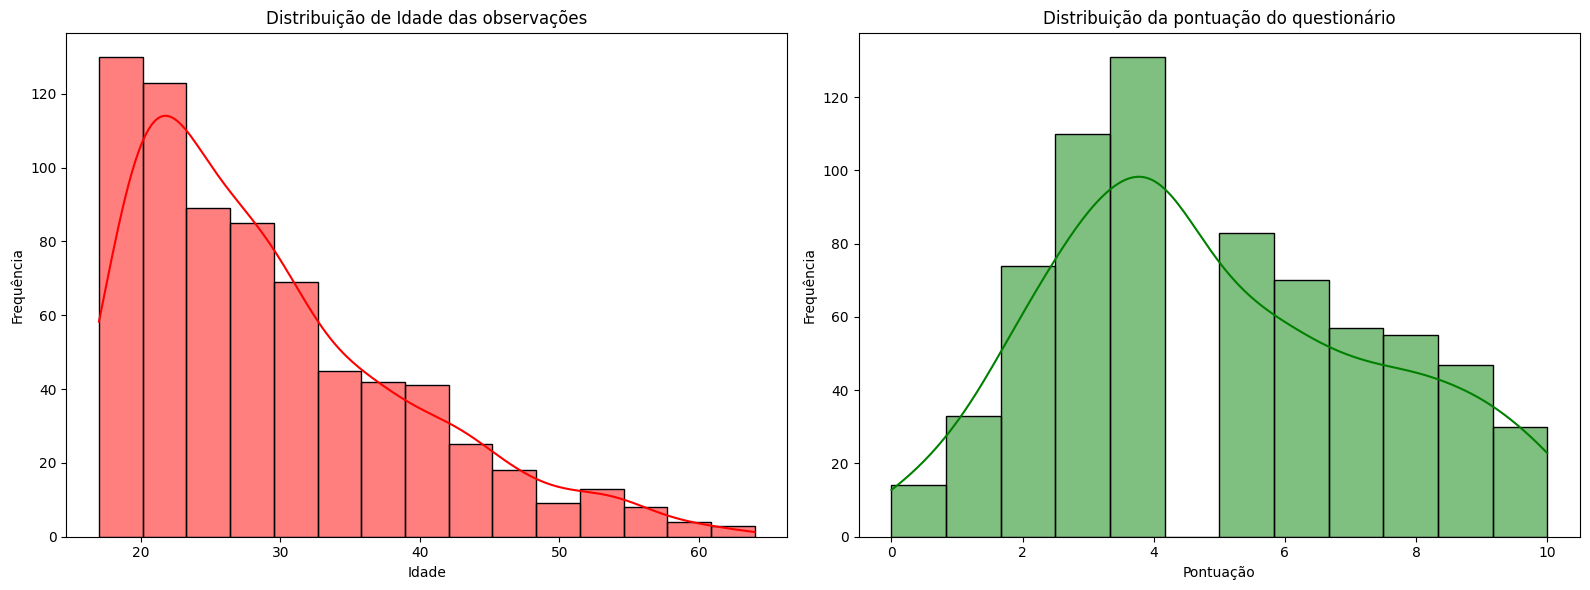

In [150]:
# Plotando um histograma que mostra a distribuição dos resultados por idade e pontuação no questionário

# Definindo 1 figura e 2 eixos, além do tamanho da figura
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: distribuição da idade das observações
sns.histplot(data=df, x='age', kde=True, ax=axes[0], color="red")
axes[0].set_title('Distribuição de Idade das observações')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# Gráfico 2: distribuição da pontuação das observações
sns.histplot(data=df, x='result', kde=True, ax=axes[1], color="green")
axes[1].set_title('Distribuição da pontuação do questionário')
axes[1].set_xlabel('Pontuação')
axes[1].set_ylabel('Frequência')

# Ajusta o layout e plota os gráficos
plt.tight_layout()
plt.show()

### Análise da distribuição das classes (`age`) e (`result`)

Os histogramas acima mostram a distribuição das duas principais variáveis numéricas do nosso dataset.

- **Distribuição de Idade (`age`):** O gráfico de distribuição por idade confirma que o dataset é composto majoritariamente por **adultos jovens**. A frequência de participantes é mais alta na faixa dos 20-25 anos e diminui consideravelmente com o avanço da idade.

- **Distribuição da Pontuação (`result`):** O gráfico de distribuição do resultado do questionário mostra a concentração de pontuações mais baixas (entre 2 e 4), que corresponde ao grupo majoritário com resultado negativo na triagem, enquanto as pontuações mais altas (em menor número) representam o grupo com resultado positivo.

------------------------------------------------------------------------------------------------------------------------------------------------------

C:\Users\Matheus\AppData\Local\Temp\ipykernel_17276\3943971682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class_asd', y='age', showmeans=True, palette="Greens")


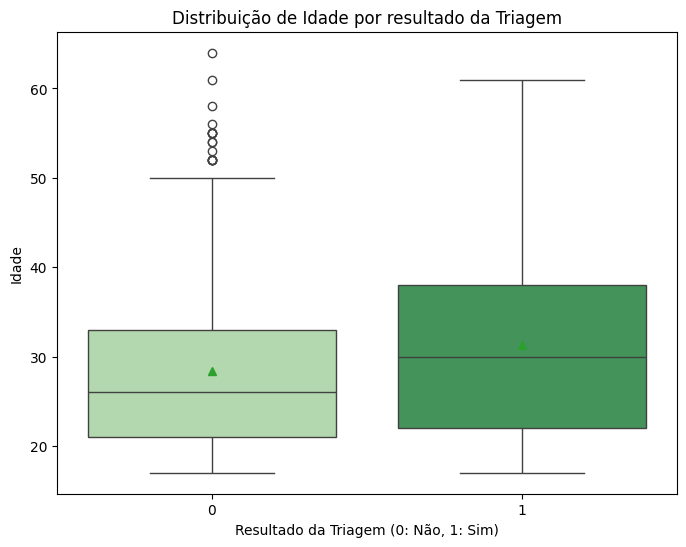

In [139]:
# Plotando um boxplot que mostra a distribuição das idades em relação ao resultado da triagem
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class_asd', y='age', showmeans=True, palette="Greens")
plt.title('Distribuição de Idade por resultado da Triagem')
plt.xlabel('Resultado da Triagem (0: Não, 1: Sim)')
plt.ylabel('Idade')
plt.show()

### Análise do Boxplot: (`age`) x (`result`)

O boxplot acima compara a distribuição de idade entre os grupos com resultado da triagem negativo (0) e positivo (1). Observa-se que o grupo com resultado positivo tende a ter uma idade mais elevada, tanto na média (triângulo verde) quanto na mediana (linha central). 

------------------------------------------------------------------------------------------------------------------------------------------------------

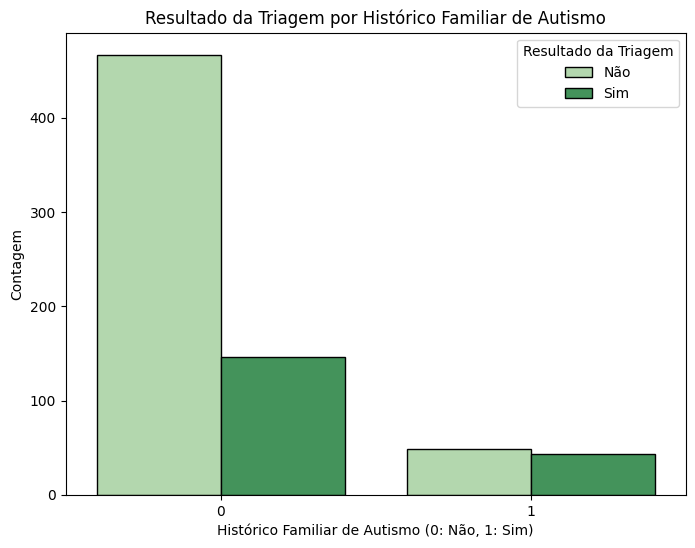

In [144]:
# Distribuição dos resultados da triagem por histórico familiar do paciente 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='austim', hue='class_asd', palette="Greens", edgecolor="black")
plt.title('Resultado da Triagem por Histórico Familiar de Autismo')
plt.xlabel('Histórico Familiar de Autismo (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.legend(title='Resultado da Triagem', labels=['Não', 'Sim'])
plt.show()

### Análise Bivariada: histórico familiar x resultado da triagem

Este gráfico demonstra que ter um histórico familiar de autismo (`austim` = 1) aumenta drasticamente a proporção de resultados positivos na triagem.

Enquanto no grupo sem histórico familiar (barra da esquerda) os resultados negativos são a maioria, no grupo com histórico (barra da direita) a chance de um resultado positivo é muito mais elevada. Isso indica que o histórico familiar é uma feature preditiva muito forte para o nosso modelo.

------------------------------------------------------------------------------------------------------------------------------------------------------

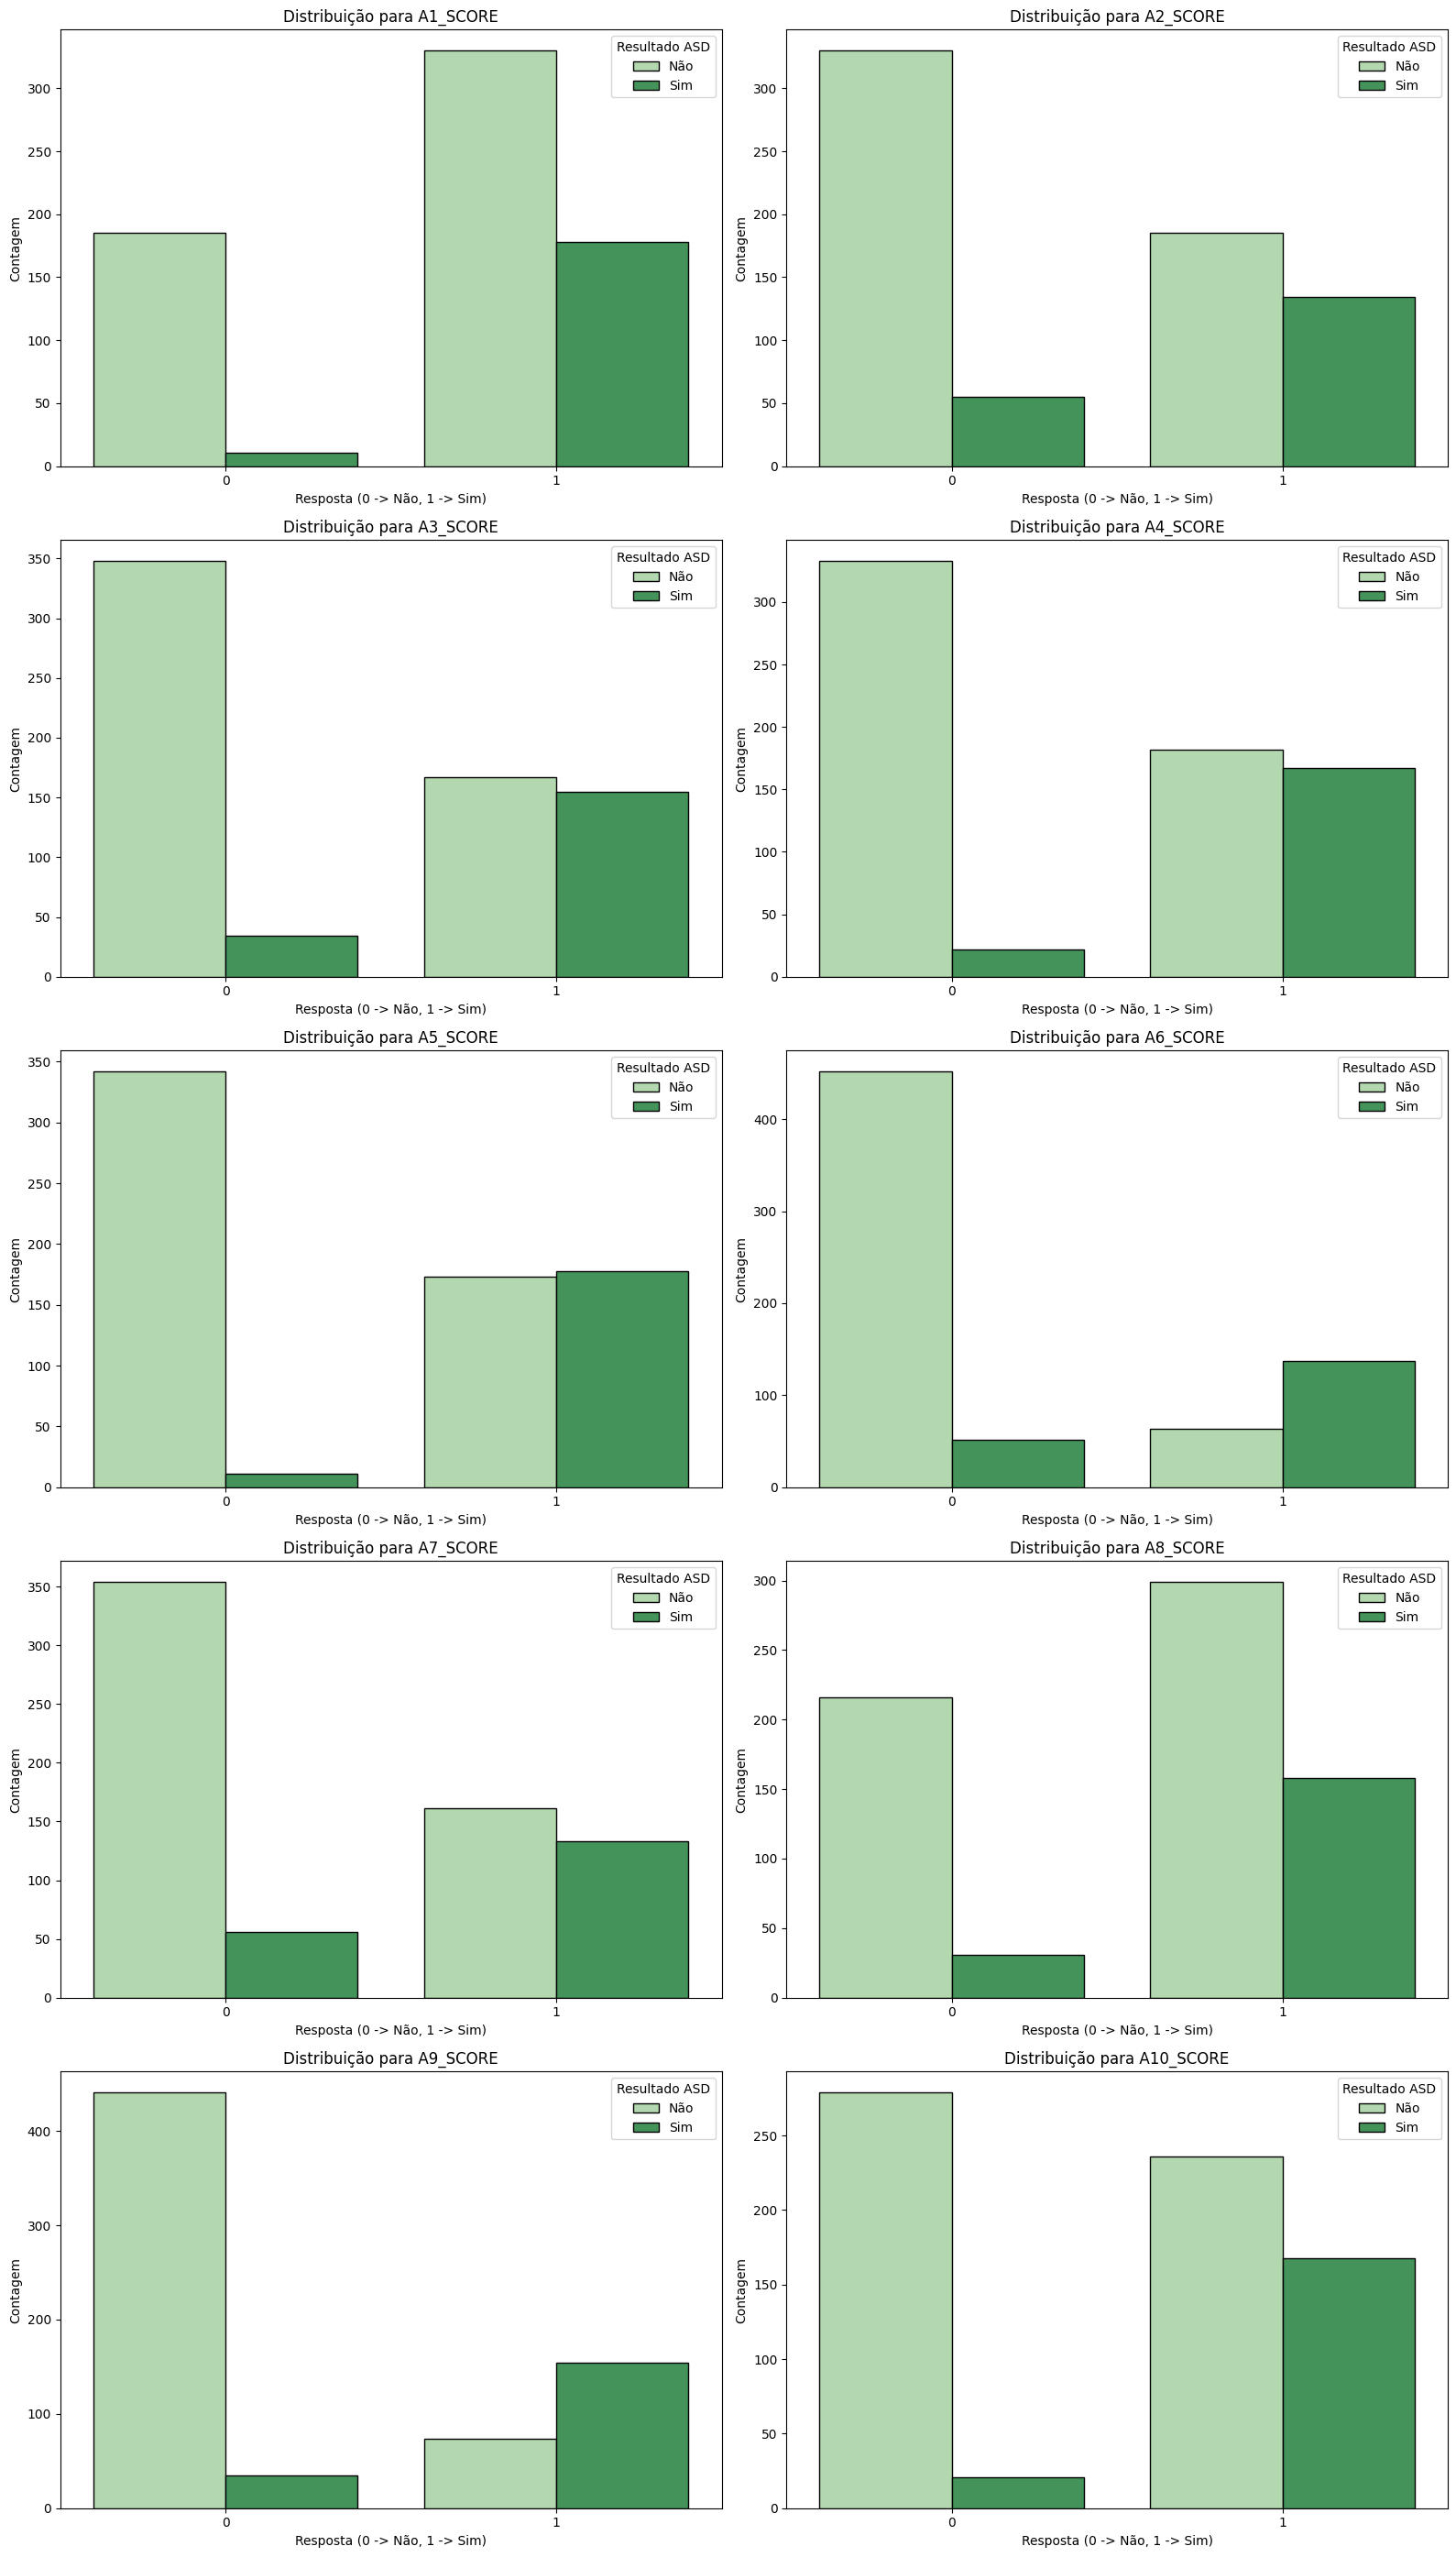

In [145]:
# Lista com o nome das colunas correspondentes ao questionário
indice_colunas = [f'a{i}_score' for i in range(1, 11)]

# Plotando um conjunto de gráficos de relação bivariada
fig, axes = plt.subplots(5, 2, figsize=(16, 28)) # 5 colunas com 2 gráficos em cada uma, e figura com dimensões de tamanho em 15x28
axes = axes.flatten() # Transforma em uma lista de 10 eixos

# Loop for para geração de um gráfico para cada coluna de score do questionário
for i, nome_coluna in enumerate(indice_colunas):
    # Plotando um countplot para cada eixo 'i' 
    sns.countplot(data=df, x=nome_coluna, hue='class_asd', ax=axes[i], palette="Greens", edgecolor="black")
    axes[i].set_title(f'Distribuição para {nome_coluna.upper()}')
    axes[i].set_xlabel(f'Resposta (0 -> Não, 1 -> Sim)')
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title='Resultado ASD', labels=['Não', 'Sim'])
# Ajustando o layout geral 
plt.tight_layout()
plt.show()

### Análise bivariada: respostas do questionário x resultado

Os gráficos acima detalham como cada resposta do questionário (`A1` a `A10`) se relaciona com o resultado final da triagem.

A principal conclusão é que todas as 10 perguntas são preditivas, pois em todos os casos uma resposta "Sim" (1) aumenta drasticamente a proporção de resultados positivos para TEA. No entanto, as perguntas relacionadas à cognição e percepção social se destacam como os indicadores mais fortes, especialmente `A9_SCORE`, `A5_SCORE`, `A6_SCORE` e `A4_SCORE`. 

------------------------------------------------------------------------------------------------------------------------------------------------------

In [134]:
# Gerando a matriz de correlação 
matriz_corr = df.corr()
matriz_corr.style.background_gradient(cmap="Greens", axis="columns") # Formatando com cores a tabela

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,jaundice,austim,result,class_asd,ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others
a1_score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.007917,-0.075011,-0.019077,0.097630,0.397454,0.297628,0.000327,-0.039690,0.012858,0.061658,0.068064,-0.016137,0.023114,0.147285,0.023427
a2_score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.082819,-0.047393,0.112615,0.074555,0.392540,0.311382,-0.068819,-0.163325,0.077637,-0.018877,0.033277,-0.031689,0.070814,0.184478,0.041434
a3_score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.098784,0.000795,0.061760,0.113697,0.552356,0.441074,-0.096640,-0.099556,-0.031762,0.022322,0.031789,-0.032791,-0.054105,0.226795,-0.034627
a4_score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.107819,-0.056508,0.064918,0.193820,0.586025,0.469945,-0.075407,-0.119528,-0.003758,-0.030485,0.104059,0.001122,-0.030116,0.262588,-0.037396
a5_score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.009441,-0.039688,0.034378,0.090009,0.639706,0.537004,-0.038032,-0.032360,0.065971,0.010941,0.085984,-0.043521,0.000263,0.131800,0.037823
a6_score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.092384,-0.083615,0.078366,0.114048,0.630012,0.592091,-0.046146,-0.074181,0.036618,0.030574,-0.031884,-0.009954,-0.024141,0.246367,-0.023759
a7_score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.000978,0.061900,0.030850,-0.008610,0.454848,0.351429,-0.065825,0.027561,0.024567,-0.009178,0.063239,-0.044756,-0.047178,0.089954,0.044539
a8_score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.064350,0.064127,0.012101,0.034845,0.324020,0.237161,0.008522,0.032567,-0.036210,0.056621,0.107797,-0.018160,0.035782,0.004735,-0.051302
a9_score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.128472,0.006940,0.057717,0.167644,0.661205,0.635576,-0.091765,-0.054640,0.076990,-0.027287,0.027822,-0.044237,-0.031145,0.209907,0.054495
a10_score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.046979,-0.055246,0.052201,0.117969,0.537205,0.385917,-0.047715,-0.042250,0.015879,-0.031155,0.026327,-0.086242,-0.045096,0.184897,-0.043768


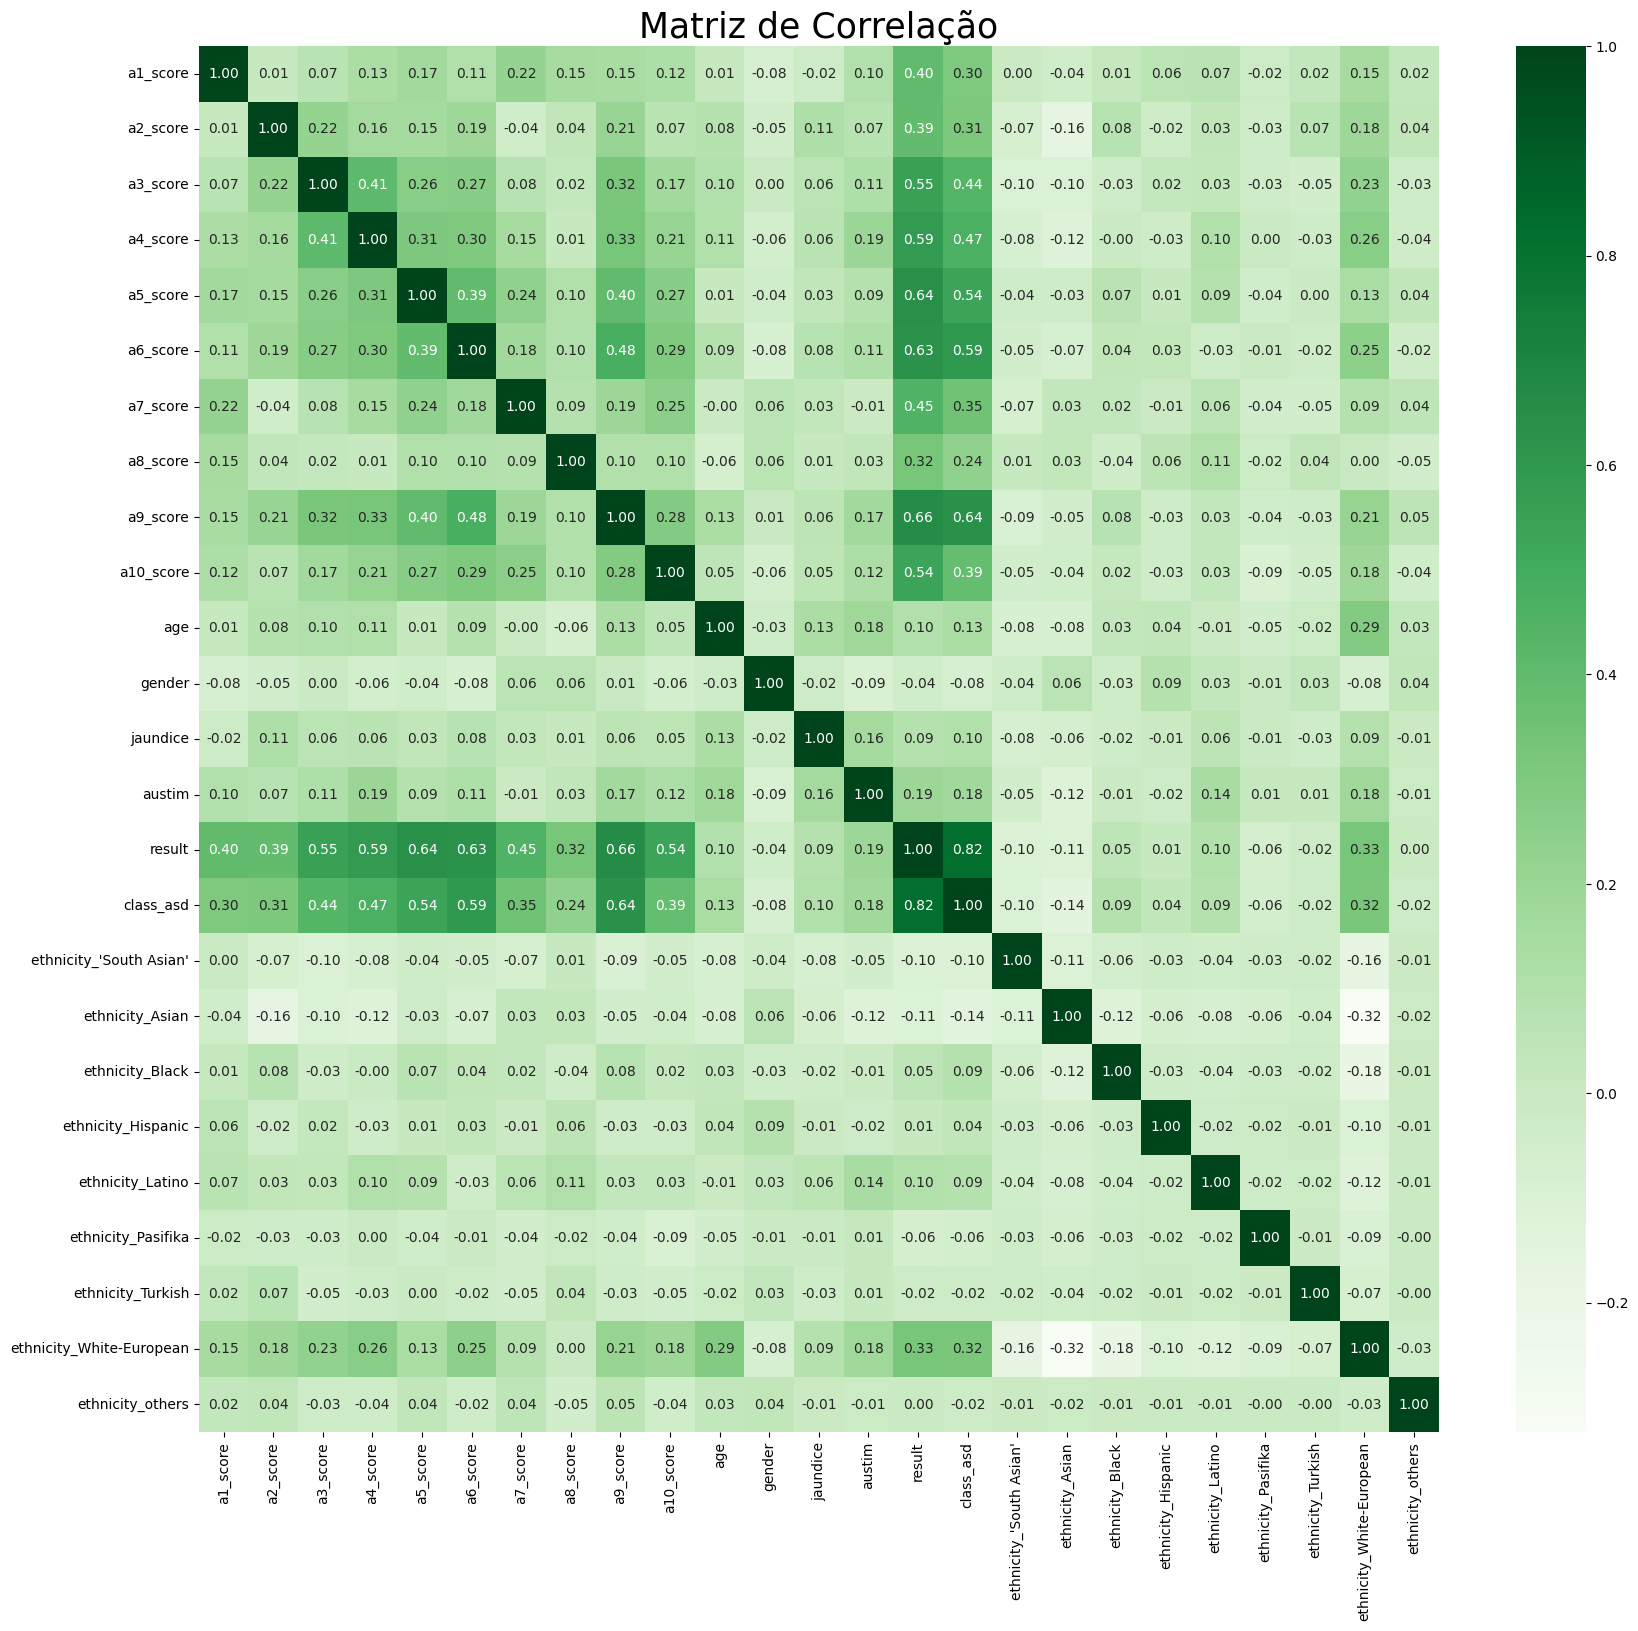

In [133]:
# Plotando a matriz de correlação através de um heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    matriz_corr, 
    annot=True, # Mostra os números de correlação dentro de cada célula
    fmt=".2f", # Formata os números para terem apenas duas casas decimais
    cmap="Greens" # Define as cores que distinguem valores positivos (quentes) e negativos (frios)
)
plt.title('Matriz de Correlação', fontsize=25)
plt.show()

### Análise da Matriz de Correlação:

O heatmap acima confirma quantitativamente as relações entre as variáveis:

- **Preditores Mais Fortes:** A pontuação total (`result`) tem a maior correlação positiva (0.82). Dentre as respostas individuais, `a9_score` (0.54), `a5_score` (0.45), e `a6_score` (0.45) são as mais influentes.
- **Preditores Moderados:** O histórico familiar (`austim`) tem uma correlação positiva moderada de 0.18.
- **Preditores Fracos:** As variáveis demográficas como `age`, `gender`, e `ethnicity` mostram correlação próxima de zero, indicando baixo poder preditivo.

**Conclusão da EDA:** As respostas ao questionário são, de longe, os indicadores mais importantes. Com isso, encerramos a fase de exploração com uma compreensão clara das features mais promissoras para a modelagem.

------------------------------------------------------------------------------------------------------------------------------------------------------

# Modelagem - Classificação - Árvore de Decisão 

In [ ]:
# Importando as bibliotecas para modelagem 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree

# Separando os dados 
X = df.drop(columns="class_asd") # Features (características)
y = df["class_asd"] # Target (rótulo)

# Dividindo os dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Instanciando o modelo 
modelo = DecisionTreeClassifier(max_depth=5, # Profundidade máxima da árvore
                                min_samples_leaf=10, # Quantidade mínima de observações em cada nó folha
                                min_samples_split=20,  # Quantidade mínima de observações para que cada nó possa ser dividido em outro nó
                                criterion="entropy", # Critério utilizado para escolha das variáveis aplicadas as condicionais em cada nível da árvore
                                class_weight="balanced", # Faz o balanceamento entre as classes rótulo
                                random_state=42)

# Treinando o modelo com os dados de treino
modelo.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [ ]:
# Prevendo com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliando o desempenho do modelo 
print("--------------- Matriz de Confusão ---------------")
matriz_conf = confusion_matrix(y_test, y_pred)
print(matriz_conf)
print("--------------- Métricas de Avaliação ---------------")
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia}")
precisao = precision_score(y_test, y_pred)
print(f"Precisão: {precisao}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

--------------- Matriz de Confusão ---------------
[[155   0]
 [  0  57]]
--------------- Métricas de Avaliação ---------------
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0


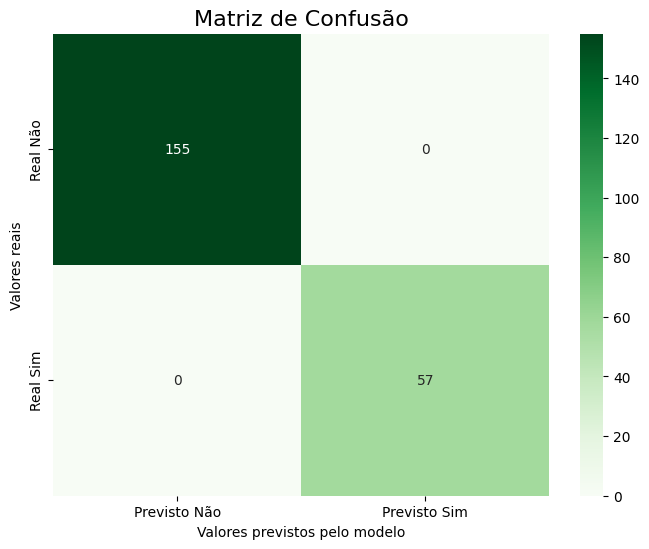

In [129]:
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_conf, 
    annot=True, # Mostra os números dentro de cada célula
    fmt="d", # Formata os números como inteiros
    cmap="Greens", # Mapa de cores
    xticklabels=['Previsto Não', 'Previsto Sim'], # Rótulos para o eixo X
    yticklabels=['Real Não', 'Real Sim'] # Rótulos para o eixo Y
)
plt.xlabel('Valores previstos pelo modelo')
plt.ylabel('Valores reais')
plt.title('Matriz de Confusão', fontsize=16)
plt.show()

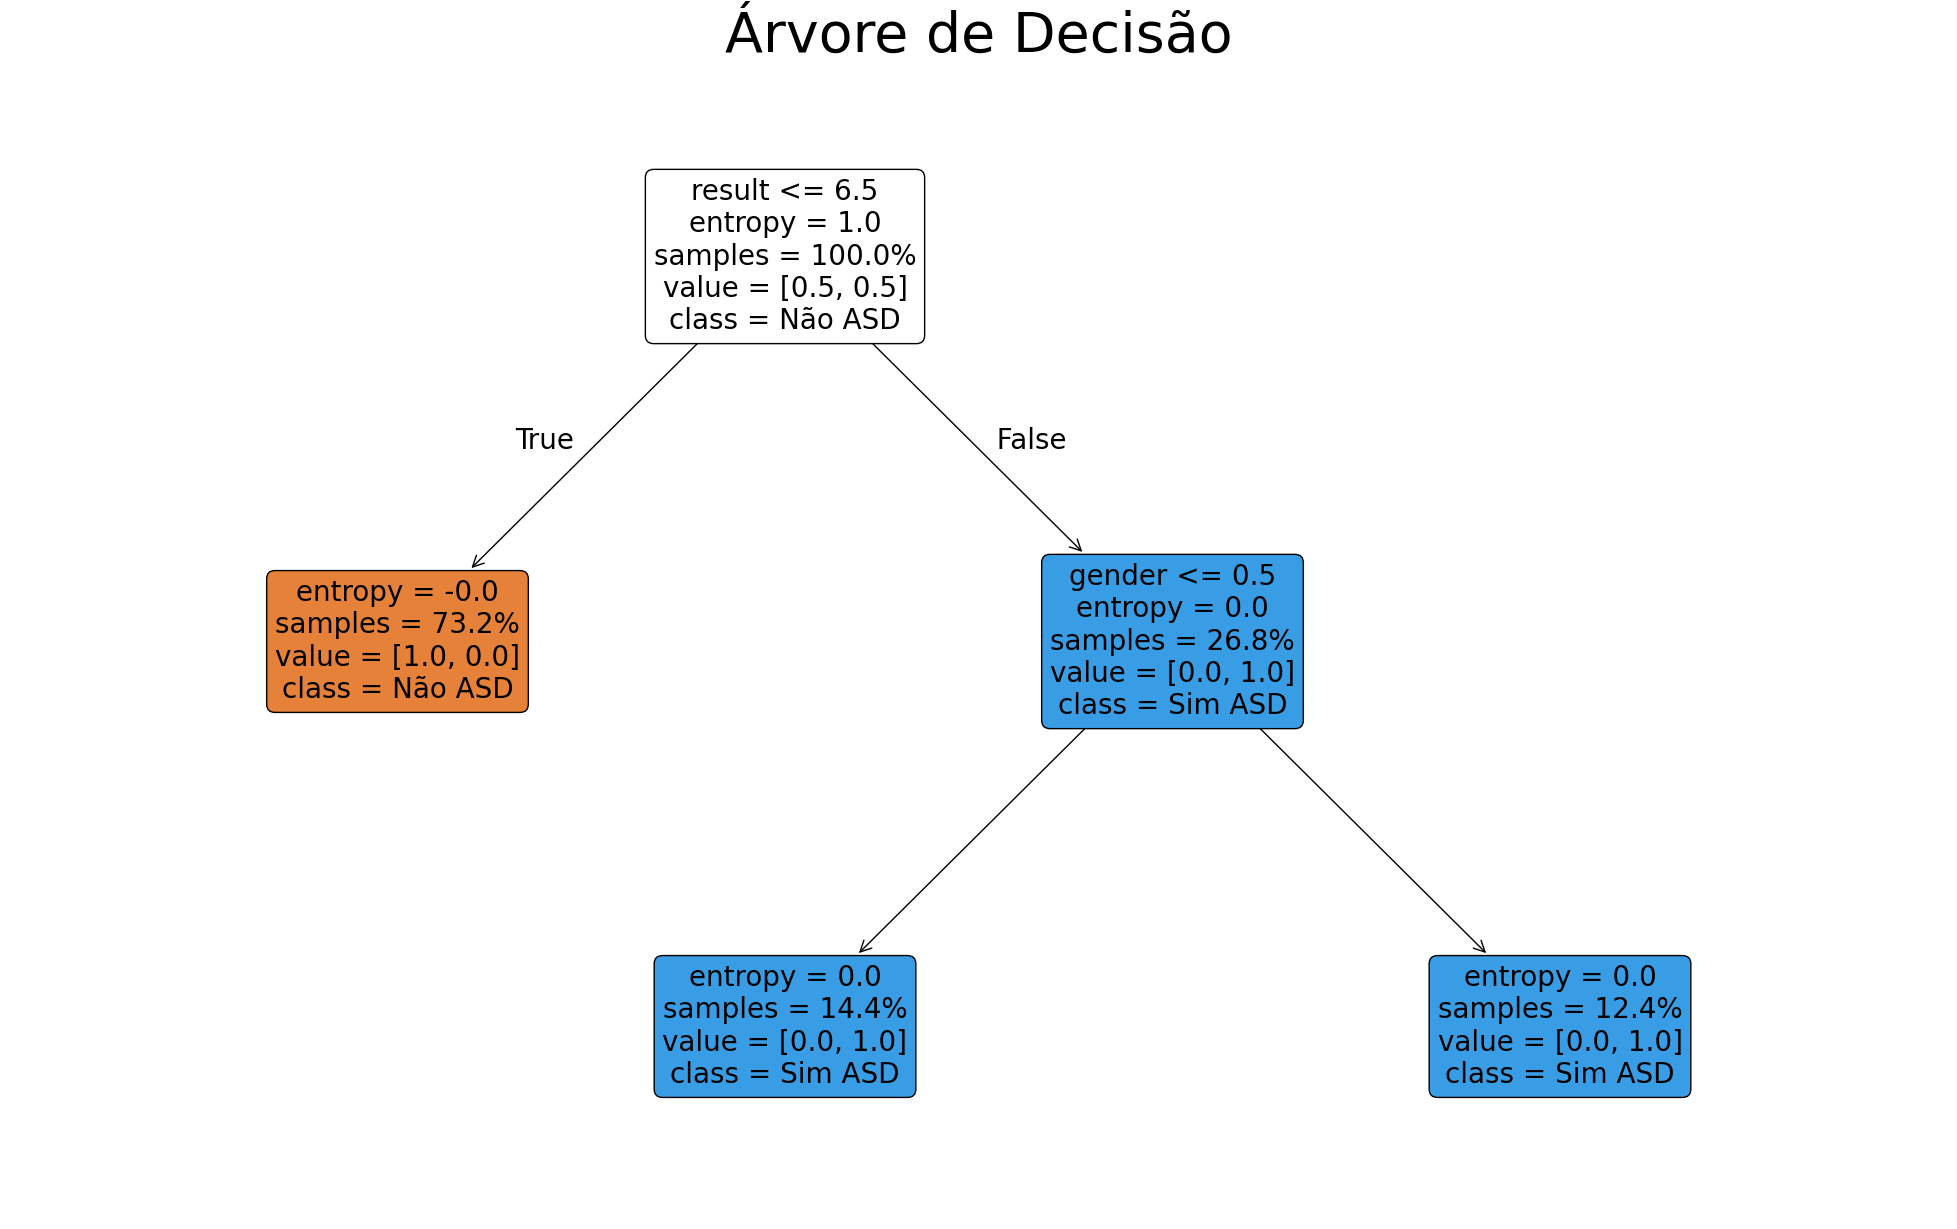

In [151]:
# Plotando a árvore de decisão
plt.figure(figsize=(25, 15))
plot_tree(
    modelo, 
    filled=True, # Preenche os nós com cores
    feature_names=X.columns, # Nomes das features
    class_names=['Não ASD', 'Sim ASD'], # Nomes das classes para o resultado
    rounded=True, # Deixa os nós com os cantos arredondados
    proportion=True, # Mostra a proporção das observações das classes 
    precision=2, # Usa 2 casas decimais nos valores
    fontsize=20
)
plt.title("Árvore de Decisão", fontsize=40)
plt.show()